## decision tree

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
df['company']=df['company'].astype('category')
df['company']=df['company'].cat.codes

df['job']=df['job'].astype('category')
df['job']=df['job'].cat.codes

df['degree']=df['degree'].astype('category')
df['degree']=df['degree'].cat.codes

In [4]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [5]:
x=df.drop(columns="salary_more_then_100k")
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [6]:
y=df["salary_more_then_100k"]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [9]:
x_train

,company,job,degree
6,0,2,1
10,1,2,0
4,2,1,0
1,2,2,1
14,1,1,0
0,2,2,0
15,1,1,1
9,0,0,1
8,0,0,0
12,1,0,0


In [10]:
y_train[:5]

6     0
10    1
4     0
1     0
14    1
Name: salary_more_then_100k, dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=model.predict(x_train)
y_pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [14]:
model.score(x_train,y_pred)

1.0

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

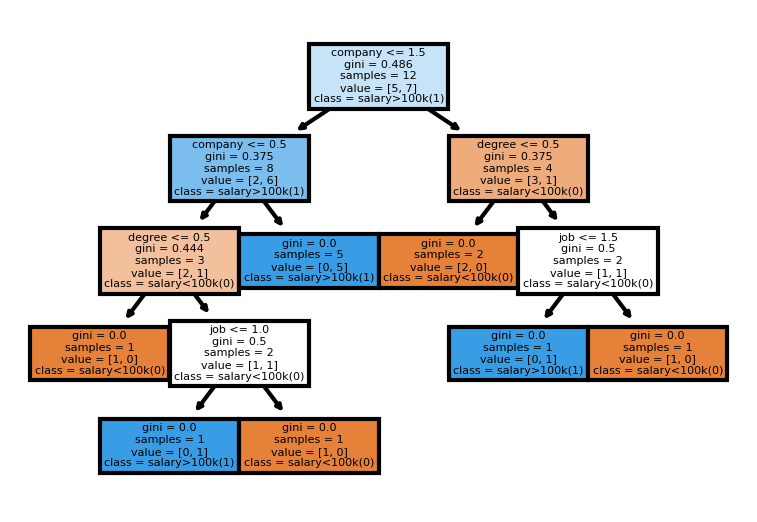

In [18]:
input=["company","job","degree"]
target=['salary<100k(0)','salary>100k(1)']
fig=plt.figure(figsize=(3,2),dpi=300)
tree.plot_tree(model,feature_names=input,class_names=target,filled=True)
fig.savefig('decision_tree.png')